In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))



Saving sentiments.csv to sentiments.csv
User uploaded file "sentiments.csv" with length 238803811 bytes


In [26]:
# Import all necessary libraries
import pandas as pd                 # For data manipulation
import numpy as np                  # For numerical computations
import seaborn as sns               # For advanced visualizations
import matplotlib.pyplot as plt     # For basic plotting
import warnings
from sklearn import preprocessing
import re


from sklearn.cluster import KMeans

from sklearn.model_selection import KFold, learning_curve, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Settings to improve readability
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)




In [10]:
# Load the dataset
df = pd.read_csv("sentiments.csv", encoding='latin1', names = ['Target','ID','Date','Query','User','Text'])

# Preview first few rows
df.head(100)

,Target,ID,Date,Query,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
95,0,1467836448,Mon Apr 06 22:26:27 PDT 2009,NO_QUERY,Dogbook,Strider is a sick little puppy http://apps.fa...
96,0,1467836500,Mon Apr 06 22:26:28 PDT 2009,NO_QUERY,natalieantipas,"so rylee,grace...wana go steve's party or not?..."
97,0,1467836576,Mon Apr 06 22:26:29 PDT 2009,NO_QUERY,timdonnelly,"hey, I actually won one of my bracket pools! T..."
98,0,1467836583,Mon Apr 06 22:26:29 PDT 2009,NO_QUERY,homeworld,"@stark YOU don't follow me, either and i work..."


In [11]:
# Shape of the dataset
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])

# Check data types and non-null counts
df.info()

# Check summary statistics for numeric columns
df.describe()


Total Rows: 1600000
Total Columns: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1600000 non-null  int64 
 1   ID      1600000 non-null  int64 
 2   Date    1600000 non-null  object
 3   Query   1600000 non-null  object
 4   User    1600000 non-null  object
 5   Text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


,Target,ID
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [12]:
# Check total missing values per column
df.isnull().sum().sort_values(ascending=False)


,0
Target,0
ID,0
Date,0
Query,0
User,0
Text,0


In [17]:
# Data cleaning

# Cleaning function
def clean_tweet(text):
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"#", "", text)  # Remove hashtag symbol
    text = re.sub(r"[^\w\s]", "", text)   # Remove special characters and emojis
    return text.lower()  # Converting to lowercase

df['cleaned_text'] = df['Text'].apply(clean_tweet)


In [19]:
# Mapping original labels: 0 (Neg), 2 (Neutral), 4 (Pos) → -1, 0, 1
label_map = {0: 'Negative', 2: 'Neutral', 4: 'Positive'}
df['sentiment'] = df['Target'].map(label_map)


In [21]:
# Feature extraction

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['sentiment']


In [25]:
# Model building

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearSVC()
model.fit(X_train, y_train)


LinearSVC()

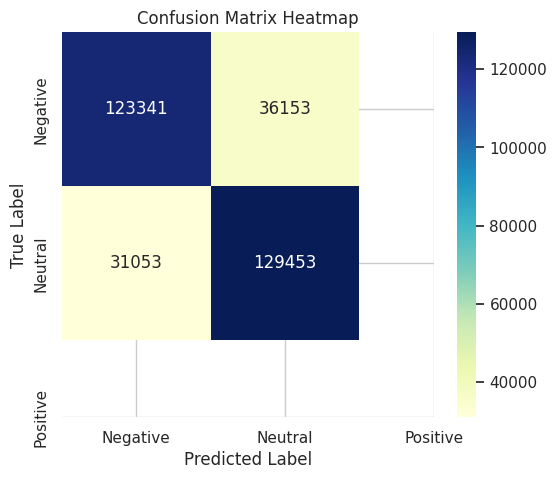

In [29]:
# Model evaluation

y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Label mapping (assumes -1 = Negative, 0 = Neutral, 1 = Positive)
labels = ["Negative", "Neutral", "Positive"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



- Linear Support Vector Machine (SVM) model was chosen to solve the challenge because it performs well with high-dimensional, sparse data like that produced by TF-IDF vectorization. SVMs are efficient, generally robust to overfitting, and require minimal parameter tuning, making them a strong baseline choice.
- The TF-IDF (Term Frequency-Inverse Document Frequency) technique was instrumental in highlighting important features by giving higher weights to informative words, while minimizing the influence of common filler words.
- Challenges faced and how it was solved : <br>The first error popped up was solved by changing the encoding to 'latin-1' using the code 'encoding='latin1''. then had to clean the data which included hashtags, emojis, etc. it was executed inside a loop where it was cleaned and processed properly. Next, there was a imbalance in the dataset, which was solved by train-test splitting. Lastly, there was a risk of overfitting due to the large vocabulary size generated by TF-IDF. To solve this, the vocabulary was limited to the top 5,000 most relevant terms.

